In [40]:
# raw data on April 1, 2022 from 16:10 to 16:40 UTC. Launch from SLC40 at 16:24 UTC, watched from Titusville
import os, obspy
import numpy as np

mseedraw = '%s/DATA/20220401_SLC40_Falcon9.mseed' % os.getenv('HOME')

if os.path.exists(mseedraw):
    straw = obspy.read(mseedraw)
else:
    straw = obspy.Stream()
    RBLAB = obspy.read('./RB383_centaur-6_0383_20220401_161500.seed')
    S39A3 = obspy.read('./S39A3_centaur-6_0378_20220401_162400.seed')
    S39A1 = obspy.read('./S39A1_centaur-6_0371_20220401_161000.seed')
    S39A2 = obspy.read('./S39A2_centaur-6_0386_20220401_161000.seed')
    BCHH3 = obspy.read('./BCHH3_centaur-6_0268_20220401_162400.seed')
    BCHH2 = obspy.read('./BCHH2_centaur-6_0384_20220401_161000.seed')
    for stobj in [BCHH3, BCHH2, S39A2, S39A1, S39A3, RBLAB]:
        for tr in stobj:
            tr.detrend('linear')
            tr.plot()
            yn = input('include?')
            if yn.lower() == 'y':
                straw.append(tr)
    straw.write('%s/DATA/20220401_SLC40_Falcon9.mseed' % os.getenv('HOME'))

In [46]:
# calibration correction
stcorrected = straw.copy()
for tr in stcorrected:
    if 'countsPerUnit' in tr.stats:
        continue
    else:
        tr.stats['countsPerUnit'] = 0.0
        if tr.stats.channel[1]=='D':
            if tr.id == 'FL.BCHH3.10.HDF': # Chaparral M25. I had it set to 1 V FS. Should have used 40 V FS. 
                tr.stats.countsPerUnit = 8e5 # counts/Pa
            else:
                tr.stats.countsPerUnit = 720 # counts/Pa
            tr.stats.units = 'Pa'
        elif tr.stats.channel[1]=='H':
            tr.stats.countsPerUnit = 3e8 # counts/(m/s)
            tr.stats.units = 'm/s'
        #print(tr.stats.countsPerUnit)
        tr.data = tr.data/tr.stats.countsPerUnit
        

720
800000.0
720
720
720
720
720
720
300000000.0
300000000.0
720
300000000.0
300000000.0
720
300000000.0
300000000.0
720
720
720


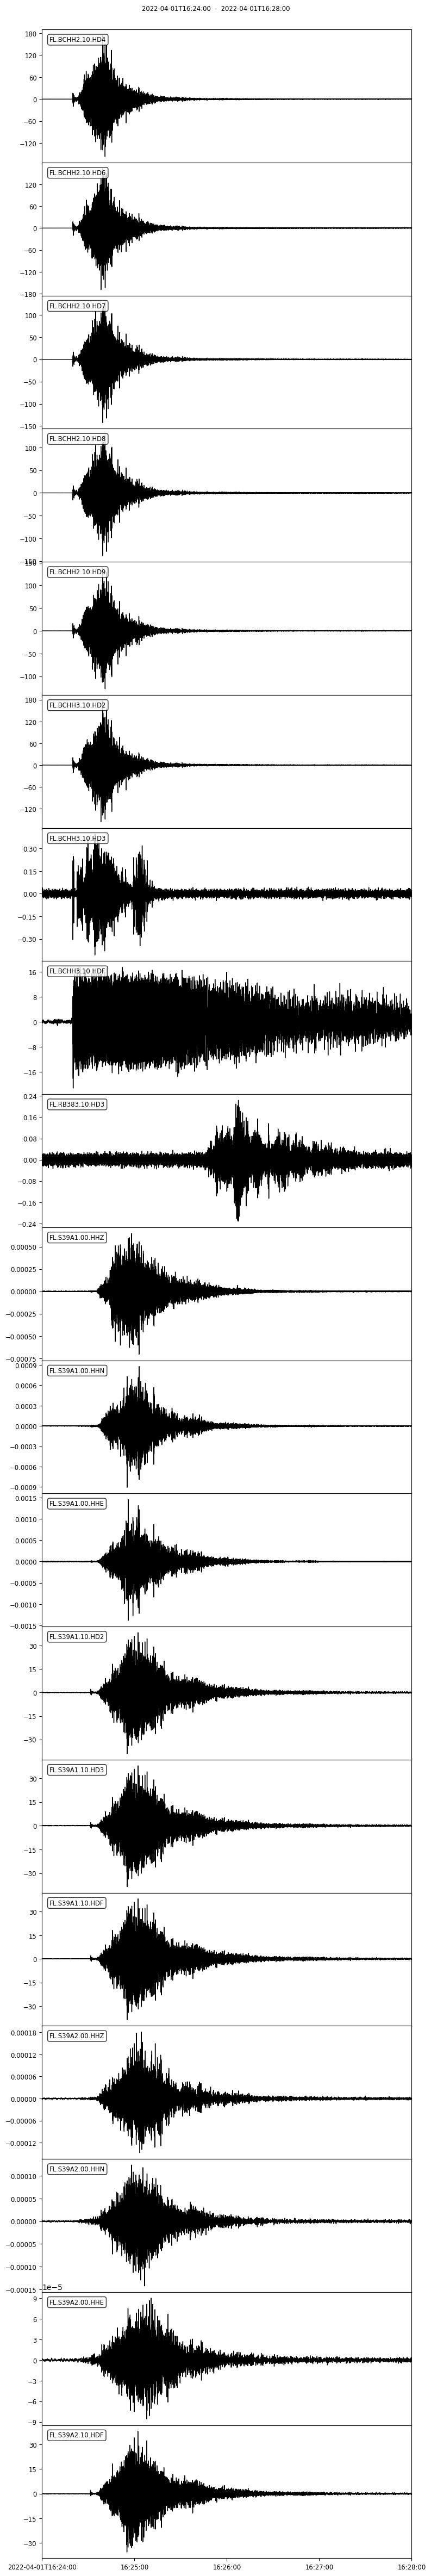

In [47]:
stfiltered = stcorrected.copy()
stfiltered.filter('highpass', freq=0.5, corners=2)
stfiltered.plot(starttime=obspy.UTCDateTime(2022,4,1,16,24,0), endtime=obspy.UTCDateTime(2022,4,1,16,28,0),  equal_scale=False);

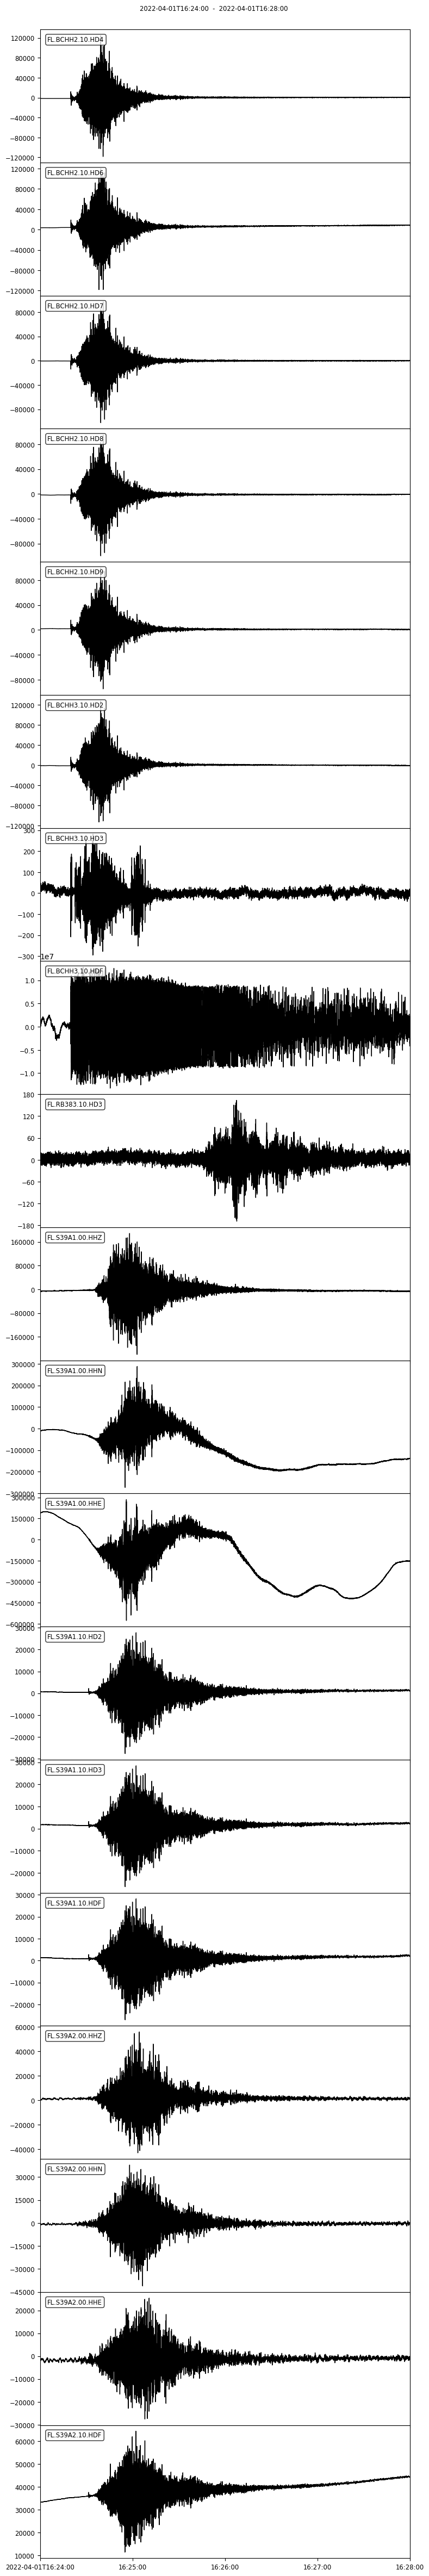

In [45]:
straw.plot(starttime=obspy.UTCDateTime(2022,4,1,16,24,0), endtime=obspy.UTCDateTime(2022,4,1,16,28,0),  equal_scale=False);


In [ ]:
# it seems that when obspy plots a Stream object, it multiplies by the calib to recover the counts again. which we never want!